<a href="https://colab.research.google.com/github/ParsaMohammadpour/EIGByz/blob/main/Assignments/Implementations/1st-Assignment/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Question 1

Implement the **Gradient Descent** with the **exact step length** and then solve an arbitraty polynomial regression with the **norm 2 regularization** with this algorithm.

### Common Part

Input matrix $X$ is as follows:
$$
X =
\left[
\begin{array}{cc}
x_1^1 & x_1^2 & ... & x_1^m \\
x_2^1 & x_2^2 & ... & x_2^m \\
   & & ... & \\
x_n^1 & x_n^2 & ... & x_n^m
\end{array}
\right]
$$
Where the $x_i$ is the i-th data and $x^j$ is the j-th component of this data. <br>
The output of the following function matrix X, is as follows:
$$
X =
\left[
\begin{array}{cc}
1 & x_1^1 & x_1^2 & ... & x_1^m & \left(x_1^1 \right)^2 & \left(x_1^2 \right)^2 & ... & \left(x_1^m \right)^d \\
1 & x_2^1 & x_2^2 & ... & x_2^m & \left(x_2^1 \right)^2 & \left(x_2^2 \right)^2 & ... & \left(x_2^m \right)^d \\
1 &    & & ... & \\
1 & x_n^1 & x_n^2 & ... & x_n^m & \left(x_n^1 \right)^2 & \left(x_n^2 \right)^2 & ... & \left(x_n^m \right)^d \\
\end{array}
\right]
$$
Where $\left(x_i^j \right)^k$ is the j-th component of the i-th data to the power k.

In [3]:
def convert_to_polynomial_matrix(X, degree, include_bias=True) -> np.array:
  """
  Gets an input vector X, then for each row, it appends 1 at the beginning,
  then for each row, it computes all elements of that row, to the power of 1
  to d and append them together
  """
  res = []
  for row in X:
    new_row = [1.0]
    for d in range(1, degree+1):
       new_row += [x for x in np.power(row, d)]
    res.append(new_row)
  return np.array(res)

### Without regularization

Gradient formula of the loss function with respect to w is:
$$
\nabla f \left(w \right) = X^T \left(Xw - Y \right)
$$

We know this from the Nocedal reference book and searching in some websites.

In [4]:
def compute_gradient(X, Y, W) -> np.array:
  """
  Here, we compute the gradient for vector w
  """
  return X.T @ (X @ W - Y)

The formula for the step length is:
$$
α = \frac{\nabla f(w)^T \nabla f(w)}{\nabla f(w)^T X^T X \nabla f(w)}
$$

We know this from the Nocedal reference book and searching in some websites.

In [5]:
def compute_step_length(X, grad) -> float:
  """
  Here, we compute the step length with the gradient and the X matrix
  """
  numinator = grad.T @ grad
  Q = X.T @ X
  denuminator = grad.T @ Q @ grad
  return numinator[0] / denuminator[0]

The next w is as follows:
$$
\alpha_{k+1} = w_k - \alpha_k \nabla f(w_k)
$$
We know this from nocedal reference book and searching in some websites.

In [6]:
def find_next_weights(X, Y, W) -> np.array:
  """
  Here, we compute the new vector W with matrix X, and vectors Y and W
  """
  grad = compute_gradient(X, Y, W)
  step_length = compute_step_length(X, grad)
  return W - step_length * grad

In [7]:
def apply_regression(simple_X, Y, iter_count, degree):
  """
  Apply the regression on the X matrix, and Y vector for iter_count iterations
  and degree of the polynomial
  """
  X = convert_to_polynomial_matrix(simple_X, degree)
  W = np.random.normal(size=X.shape[1]).reshape(-1, 1)
  W_hist = [W]
  error_hist = [np.linalg.norm(X @ W - Y)]
  step_length_hist = []
  for _ in tqdm(range(iteration_count), desc="Processing items", unit="item"):
    grad = compute_gradient(X, Y, W)
    if np.count_nonzero(grad) == 0: break
    step_length = compute_step_length(X, grad)
    W = find_next_weights(X, Y, W)
    W_hist.append(W)
    error_hist.append(np.linalg.norm(X @ W - Y))
    step_length_hist.append(step_length)

  return W, W_hist, error_hist, step_length_hist

In [8]:
data_count = 100
lower_x, upper_x = -10, 10
X = np.random.uniform(lower_x, upper_x, size=data_count).reshape(-1, 1)
noise_mean, noise_var = 0, 40
noise = np.random.normal(loc=noise_mean, scale=noise_var, size=data_count).reshape(-1, 1)
# Y = AX + b
a1, a2, a3, b = 2.5, -1.5, 0.8, -1
Y = a1 * X + a2 * np.power(X, 2) + a3 * np.power(X, 3) + b + noise

In [9]:
iteration_count = 1000
degree = 3

W, W_hist, error_hist, step_length_hist = apply_regression(X, Y, iteration_count, degree)

print()
print('Actual Values: ', b, a1, a2, a3)
print('Predicted Values: ', W)

Processing items: 100%|██████████| 1000/1000 [00:00<00:00, 23279.31item/s]


Actual Values:  -1 2.5 -1.5 0.8
Predicted Values:  [[-0.60731452]
 [ 2.21726328]
 [-1.60001239]
 [ 0.80395489]]


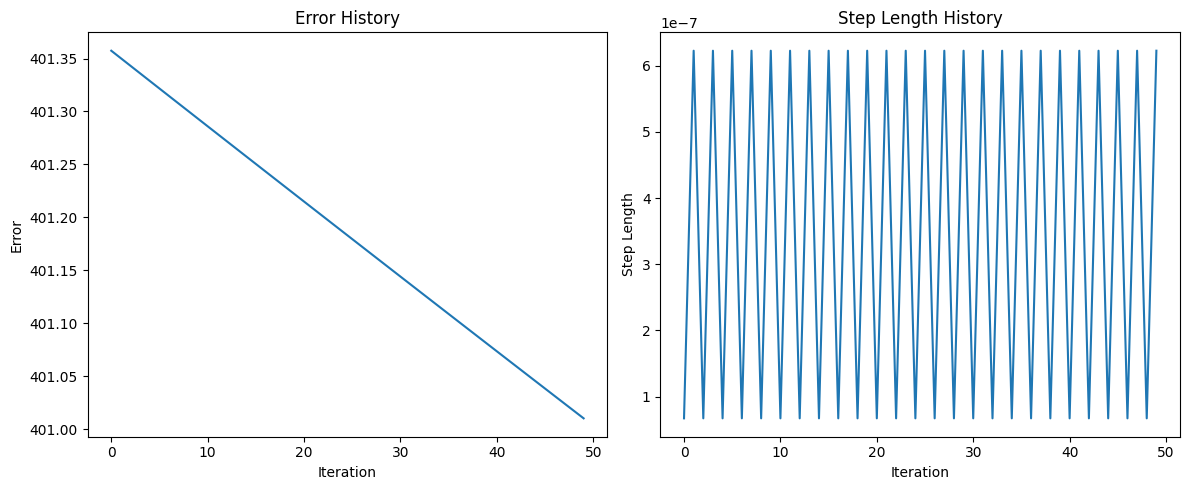

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
last_element = -50

axes[0].plot(error_hist[last_element:])
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Error")
axes[0].set_title("Error History")

axes[1].plot(step_length_hist[last_element:])
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Step Length")
axes[1].set_title("Step Length History")


plt.tight_layout()
plt.show()

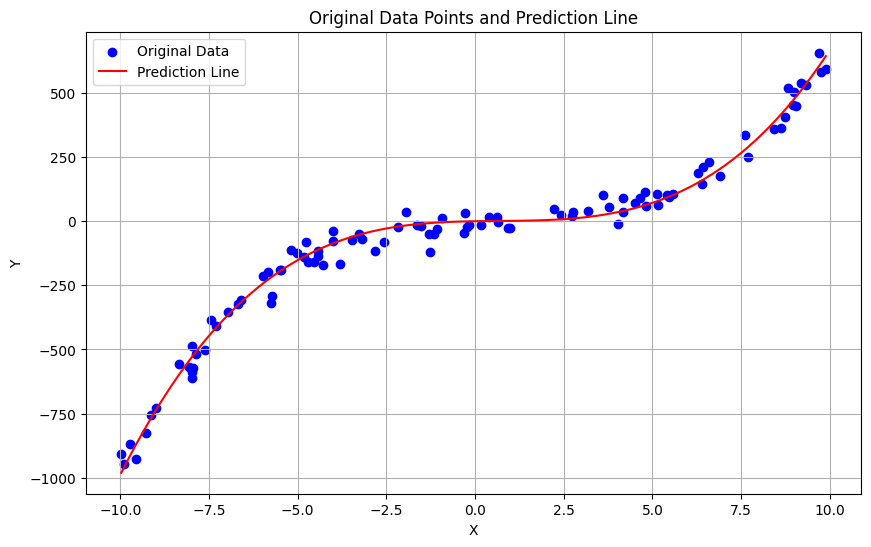

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(X, Y, label='Original Data', color='blue')

x_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_pred = convert_to_polynomial_matrix(x_pred, degree)
y_pred = X_pred @ W

# Plot the prediction line
plt.plot(x_pred, y_pred, label='Prediction Line', color='red')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data Points and Prediction Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### With regularization

Gradient formula of the loss function with respect to w is:
$$
\nabla f \left(w \right) = X^T \left(Xw - Y \right) + \lambda w
$$

In [12]:
def compute_gradient_L2_reg(X, Y, W, norm_coef) -> np.array:
  """
  Here, we compute the gradient for vector w
  """
  return X.T @ (X @ W - Y) + norm_coef * W

The formula for the step length is:
$$
α = \frac{\nabla f(w)^T \nabla f(w)}{\nabla f(w)^T \left(X^T X +\lambda I \right) \nabla f(w)}
$$

In [13]:
def compute_step_length_L2_reg(X, grad, norm_coef) -> float:
  """
  Here, we compute the step length with the gradient and the X matrix
  """
  numinator = grad.T @ grad
  Q = X.T @ X
  Q += norm_coef * np.eye(Q.shape[0])
  denuminator = grad.T @ Q @ grad
  return numinator[0] / denuminator[0]

The next w is as follows:
$$
\alpha_{k+1} = w_k - \alpha_k \nabla f(w_k)
$$
We know this from nocedal reference book and searching in some websites.

In [14]:
def find_next_weights_L2_reg(X, Y, W, norm_coef) -> np.array:
  """
  Here, we compute the new vector W with matrix X, and vectors Y and W
  """
  grad = compute_gradient_L2_reg(X, Y, W, norm_coef)
  step_length = compute_step_length_L2_reg(X, grad, norm_coef)
  return W - step_length * grad, step_length

In [15]:
def apply_regression_L2_norm(simple_X, Y, norm_coef, iter_count, degree):
  """
  Apply the regression on the X matrix, and Y vector for iter_count iterations
  and degree of the polynomial
  """
  X = convert_to_polynomial_matrix(simple_X, degree)
  W = np.random.normal(size=X.shape[1]).reshape(-1, 1)
  W_hist = [W]
  error_hist = [np.linalg.norm(X @ W - Y)]
  step_length_hist = []
  for _ in tqdm(range(iteration_count), desc="Processing items", unit="item"):
    W, step_length = find_next_weights_L2_reg(X, Y, W, norm_coef)
    W_hist.append(W)
    error_hist.append(np.linalg.norm(X @ W - Y))
    step_length_hist.append(step_length)

  return W, W_hist, error_hist, step_length_hist

In [16]:
data_count = 100
lower_x, upper_x = -10, 10
X = np.random.uniform(lower_x, upper_x, size=data_count).reshape(-1, 1)
noise_mean, noise_var = 0, 40
noise = np.random.normal(loc=noise_mean, scale=noise_var, size=data_count).reshape(-1, 1)
# Y = AX + b
a1, a2, a3, b = 2.5, -1.5, 0.8, -1
Y = a1 * X + a2 * np.power(X, 2) + a3 * np.power(X, 3) + b + noise

In [17]:
iteration_count = 1000
degree = 3
norm_coef = 1.0

W, W_hist, error_hist, step_length_hist = apply_regression_L2_norm(X, Y, norm_coef, iteration_count, degree)

print()
print('Actual Values: ', b, a1, a2, a3)
print('Predicted Values: ', W)

Processing items: 100%|██████████| 1000/1000 [00:00<00:00, 8442.64item/s]


Actual Values:  -1 2.5 -1.5 0.8
Predicted Values:  [[-0.54398448]
 [ 0.82361669]
 [-1.45158072]
 [ 0.81603488]]


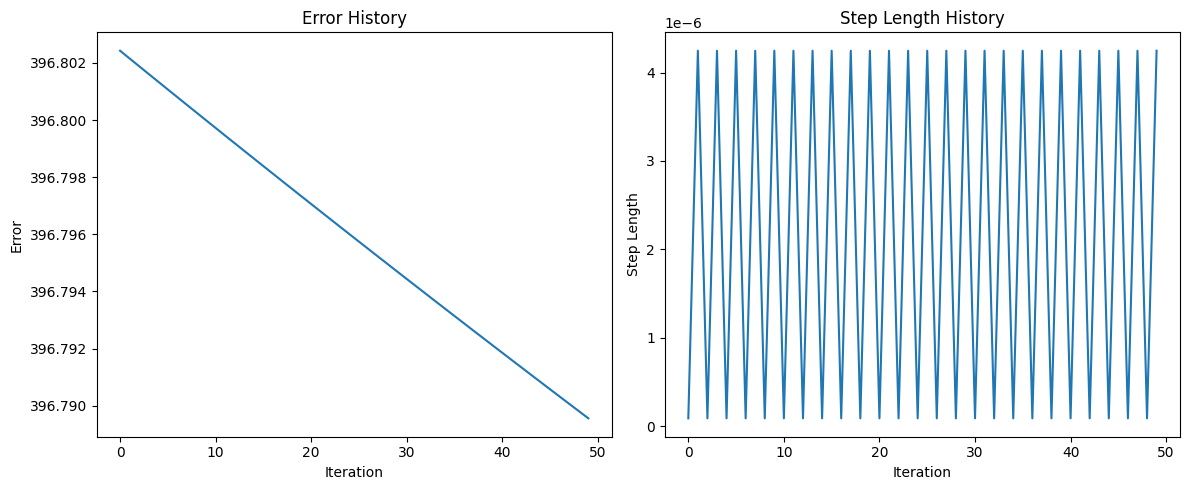

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
last_element = 50

axes[0].plot(error_hist[-last_element:])
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Error")
axes[0].set_title("Error History")

axes[1].plot(step_length_hist[-last_element:])
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Step Length")
axes[1].set_title("Step Length History")


plt.tight_layout()
plt.show()

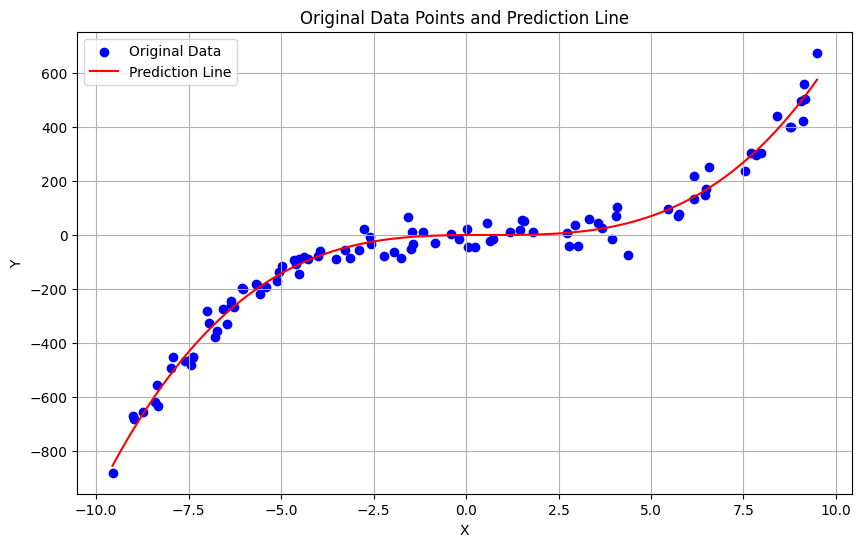

In [19]:
plt.figure(figsize=(10, 6))

plt.scatter(X, Y, label='Original Data', color='blue')

x_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_pred = convert_to_polynomial_matrix(x_pred, degree)
y_pred = X_pred @ W

# Plot the prediction line
plt.plot(x_pred, y_pred, label='Prediction Line', color='red')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data Points and Prediction Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Question 2